In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1SdJI9h4OxKGRFEfm3JOYIkiWMyBqFmw4'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# # copy it there
# !cp dataset.zip /content/drive/MyDrive

In [ ]:
path_to_zip_file = "./dataset.zip"
directory_to_extract_to = "./"
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

The dataset.zip has been extracted to the dataset directory

In [ ]:
import pandas as pd
import json

df = pd.read_csv("recipeNLG_with_entities.csv")


In [ ]:
df.head(100)

,title,ingredients,directions,link,source,NER,ingredients_entities
0,No-Bake Nut Cookies,1 c. firmly packed brown sugar\n1/2 c. evapora...,"In a heavy 2-quart saucepan, mix brown sugar, ...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...","[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
1,Jewell Ball'S Chicken,"1 small jar chipped beef, cut up\n4 boned chic...",Place chipped beef on bottom of baking dish. P...,www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom...","[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
2,Creamy Corn,2 (16 oz.) pkg. frozen corn\n1 (8 oz.) pkg. cr...,"In a slow cooker, combine all ingredients. Cov...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...","[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
3,Chicken Funny,1 large whole chicken\n2 (10 1/2 oz.) cans chi...,Boil and debone chicken. Put bite size pieces ...,www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...","[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
4,Reeses Cups(Candy),1 c. peanut butter\n3/4 c. graham cracker crum...,Combine first four ingredients and press in 13...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...","[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
...,...,...,...,...,...,...,...
95,Baked Beans,3 (1 lb.) cans pork and beans\n1/2 c. bell pep...,Cook onions and bell pepper in oil until onion...,www.cookbooks.com/Recipe-Details.aspx?id=775763,Gathered,"[""pork"", ""bell pepper"", ""onions"", ""catsup"", ""b...","[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
96,Sweet-N-Sour Chicken,2 c. diced cooked chicken\n2 Tbsp. shortening\...,Saute onion in 2 tablespoons shortening. Add c...,www.cookbooks.com/Recipe-Details.aspx?id=228506,Gathered,"[""chicken"", ""shortening"", ""onion"", ""carrot chu...","[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
97,Ambrosia,"8 to 10 juicy oranges, peeled and diced\n1 c. ...",Combine all ingredients. Chill overnight. Yiel...,www.cookbooks.com/Recipe-Details.aspx?id=342478,Gathered,"[""oranges"", ""moist coconut"", ""pecans"", ""cherri...","[{""start"": 0, ""end"": 7, ""type"": ""QUANTITY"", ""e..."
98,Crazy Peanut Butter Cookies,1 c. creamy peanut butter\n1 c. sugar\n1 egg,Mix together and roll into balls; flatten with...,www.cookbooks.com/Recipe-Details.aspx?id=892363,Gathered,"[""peanut butter"", ""sugar"", ""egg""]","[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."


In [ ]:
list(df.columns)

['title',
 'ingredients',
 'directions',
 'link',
 'source',
 'NER',
 'ingredients_entities']

The column title does not contain unique values

In [ ]:
print("unique titles#: " + str(df["title"].nunique()) + ", all titles#: " + str(len(df["title"])))

unique titles#: 1312871, all titles#: 2231142


In [ ]:
df = df[~df["ingredients"].apply(lambda x: isinstance(x, float))]

In [ ]:
df["ingredients_len"] = df["ingredients"].apply(lambda x: len(x.split("\n")))

Below there is a histogram showing number of elements in the 'ingredients' column

/home/witold/PycharmProjects/dml_analysis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


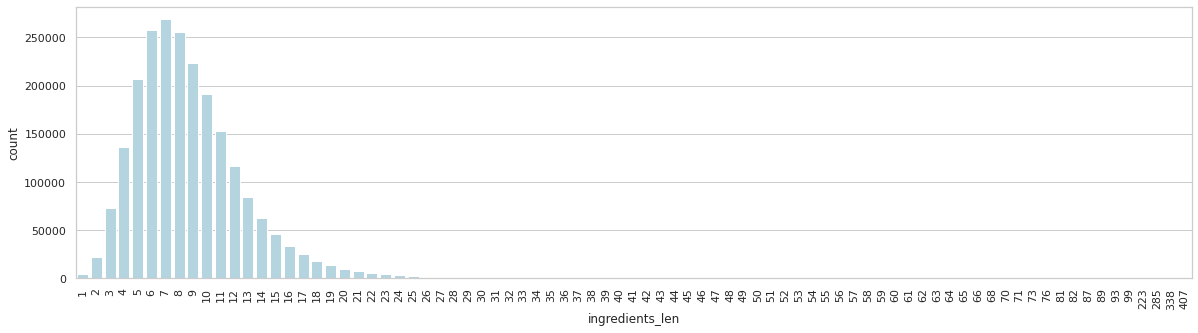

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y = df["ingredients_len"]
plt.figure(figsize=(20, 5))
g = sns.countplot(y, color="lightblue")
# g = sns.histplot(y, bins=100)
g.set(yscale="linear")
plt.xticks(rotation=90)
plt.show()

Below there is a histogram showing number of elements in the 'directions' column

In [ ]:
df = df[~df["directions"].apply(lambda x: isinstance(x, float))]

In [ ]:
df["directions_len"] = df["directions"].apply(lambda x: len(x.split(". ")))

In [ ]:
y = df["directions_len"]
plt.figure(figsize=(20, 5))
g = sns.countplot(y, color="lightblue")
g.set(yscale="linear")
plt.xticks(rotation=90)
plt.show()

/home/witold/PycharmProjects/dml_analysis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/witold/PycharmProjects/dml_analysis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


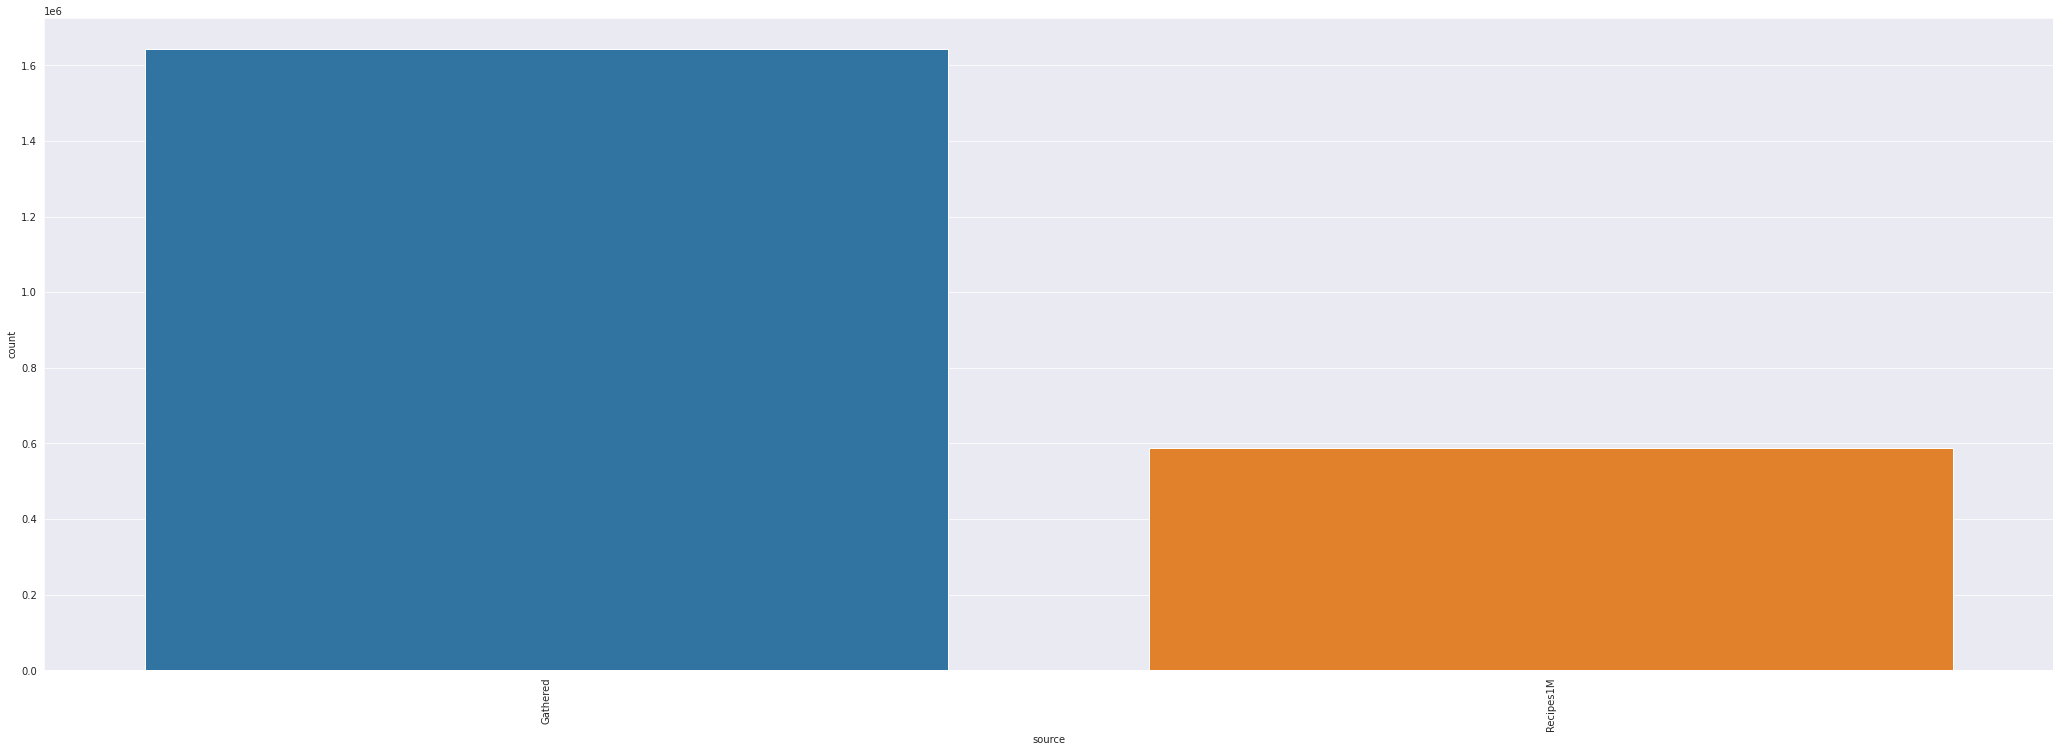

In [ ]:
y = df["source"]
plt.figure(figsize=(18*2, 12))
g = sns.countplot(y)
g.set(yscale="linear")
plt.xticks(rotation=90)
plt.show()

In [ ]:
all_entities = []
for elem in df["ingredients_entities"]:
  for ent in json.loads(elem):
    all_entities.append(ent["type"])

In [ ]:
all_entities_gs = []
for elem in df["ingredients_entities"]:
  for ent in json.loads(elem):
    all_entities_gs.append(tuple([ent["type"], ent["entity"]]))

In [ ]:
pd.DataFrame(all_entities_gs).value_counts().index

MultiIndex([('QUANTITY',                                      '1'),
            ('QUANTITY',                                      '2'),
            (    'UNIT',                                    'cup'),
            (    'UNIT',                                     'c.'),
            ('QUANTITY',                                    '1/2'),
            (    'UNIT',                               'teaspoon'),
            ('QUANTITY',                                    '1/4'),
            (    'UNIT',                                   'cups'),
            ('QUANTITY',                                      '3'),
            ( 'PROCESS',                                'chopped'),
            ...
            (    'FOOD',                            'jarbeak and'),
            (    'FOOD',              'jarbarilla marinara sauce'),
            (    'FOOD',     'jarbarilla italian spaghetti sauce'),
            (    'FOOD',                 'jarbaby string coconut'),
            (    'FOOD',        

/home/witold/PycharmProjects/dml_analysis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


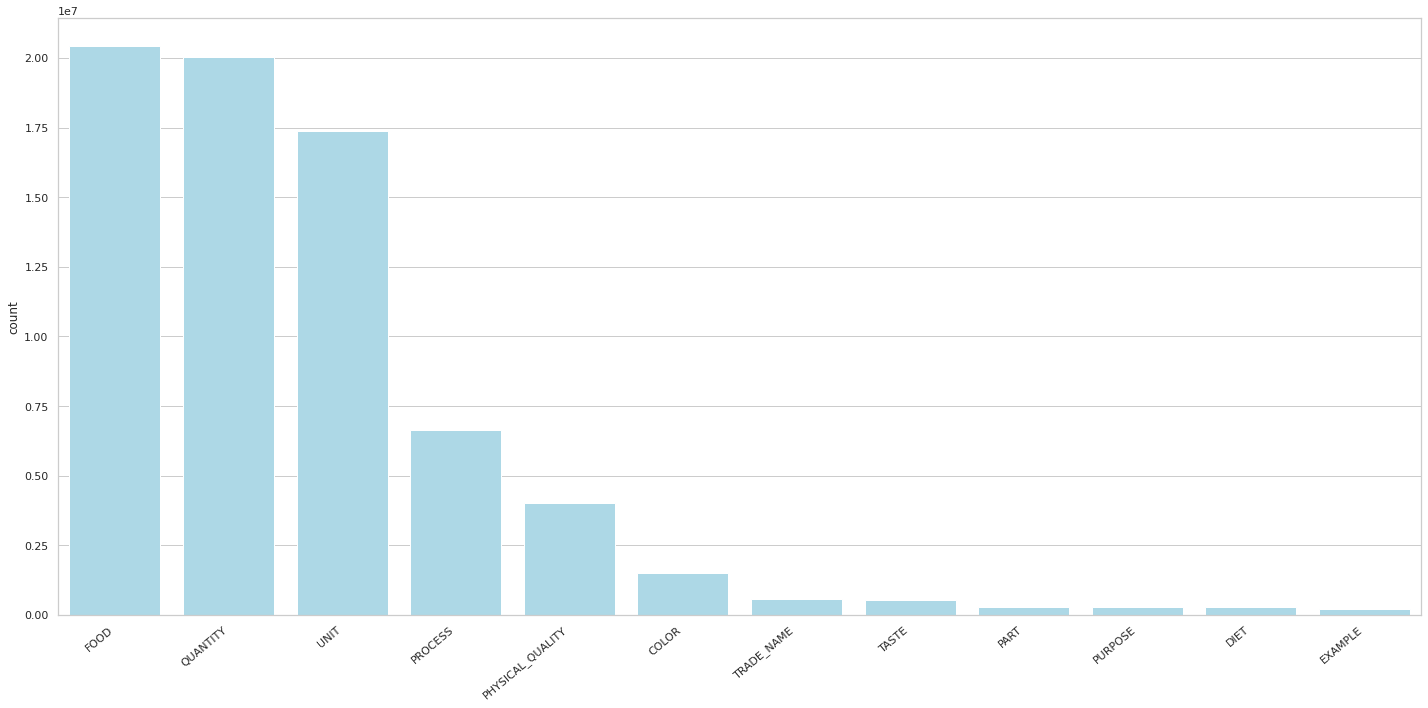

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")

ax = sns.countplot(all_entities, order=[el[0] for el in pd.DataFrame(all_entities).value_counts().index],color="lightblue", saturation=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
# plt.title(f"Histogram of {entity}")
plt.show()

In [ ]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 1.5 MB/s            
You should consider upgrading via the '/home/witold/PycharmProjects/dml_analysis/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


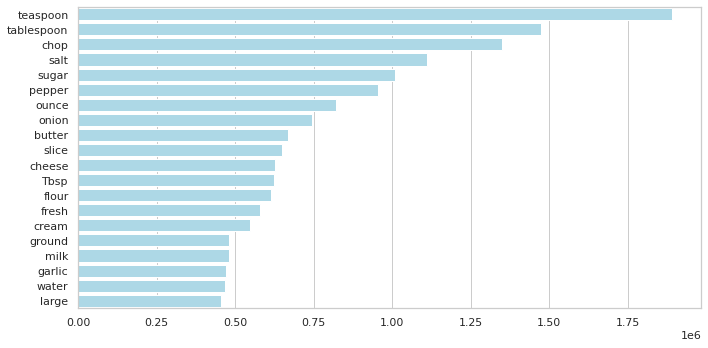

In [ ]:
from collections import  Counter
import spacy
nlp = spacy.load("en_core_web_sm")

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

def plot_top_non_stopwords_barchart(text):

    corpus=[token.lemma_ for doc in nlp.pipe(text) for token in doc if not token.is_stop and not token.is_digit and not token.is_punct and "/" not in token.lemma_ and '1⁄2' not in token.lemma_ and '1⁄4' not in token.lemma_ and '½' not in token.lemma_ and len(token.lemma_) > 3]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
      x.append(word)
      y.append(count)
    sns.barplot(x=y,y=x,color="lightblue", saturation=1)
    plt.tight_layout()
    # plt.title("Most frequent words among ingredients")
    plt.show()
plot_top_non_stopwords_barchart(df["ingredients"].tolist())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

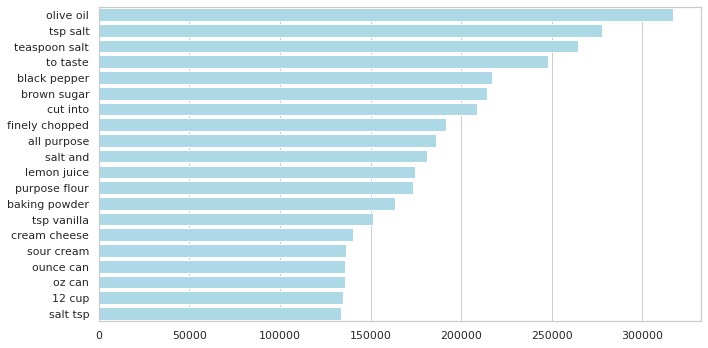

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")
top_tri_grams=get_top_ngram(df["ingredients"],n=2)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x,color="lightblue", saturation=1)
plt.tight_layout()
# plt.title("Most frequent trigrams from ingredients")
plt.show()

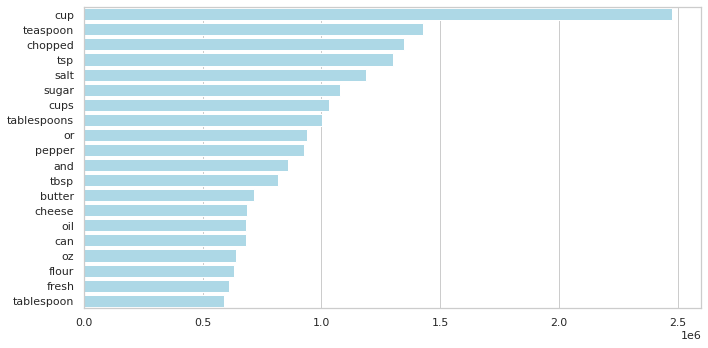

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")
top_tri_grams=get_top_ngram(df["ingredients"],n=1)
x,y = map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x,color="lightblue", saturation=1)
plt.tight_layout()
# plt.title("Most frequent trigrams from ingredients")
plt.show()

100%|██████████| 2231140/2231140 [01:12<00:00, 30957.89it/s]


FOOD: unique_values = 323576, avg. entities: 5.348820537850881, avg. token: 1.4314528860056275


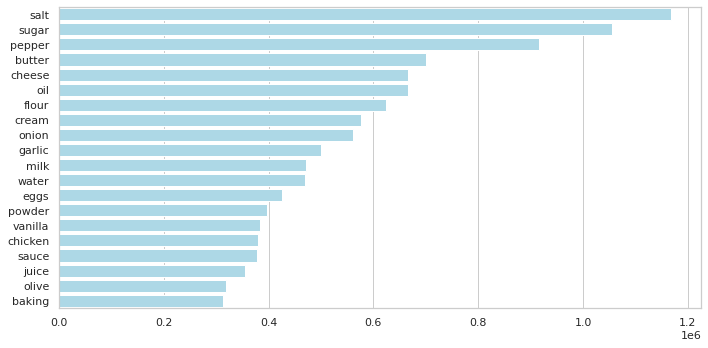

100%|██████████| 2231140/2231140 [01:09<00:00, 32199.37it/s]


QUANTITY: unique_values = 27043, avg. entities: 6.0664390657826335, avg. token: 1.0995820030330845


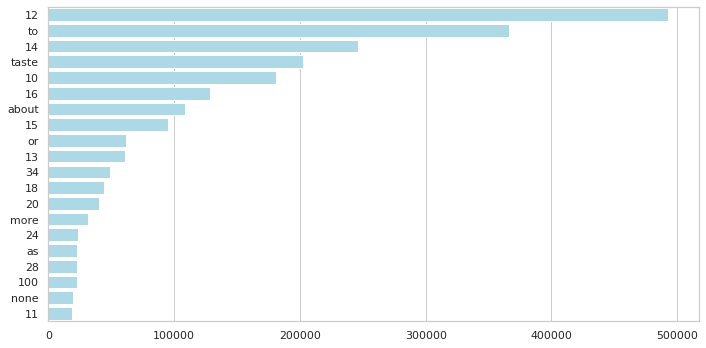

100%|██████████| 2231140/2231140 [01:10<00:00, 31660.95it/s]


UNIT: unique_values = 16005, avg. entities: 4.9524016195506615, avg. token: 1.0034957312186454


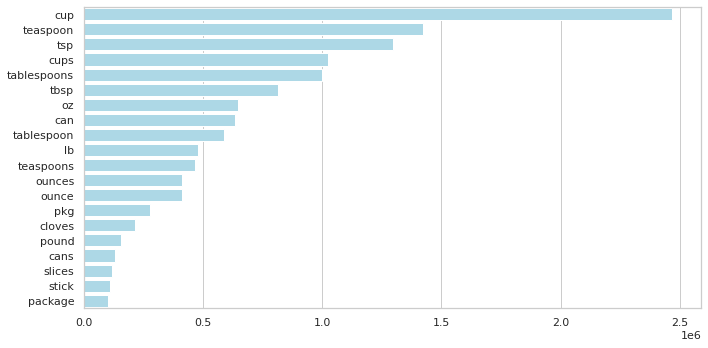

100%|██████████| 2231140/2231140 [01:06<00:00, 33722.16it/s]


PROCESS: unique_values = 114667, avg. entities: 1.9861080325021132, avg. token: 1.364354000005723


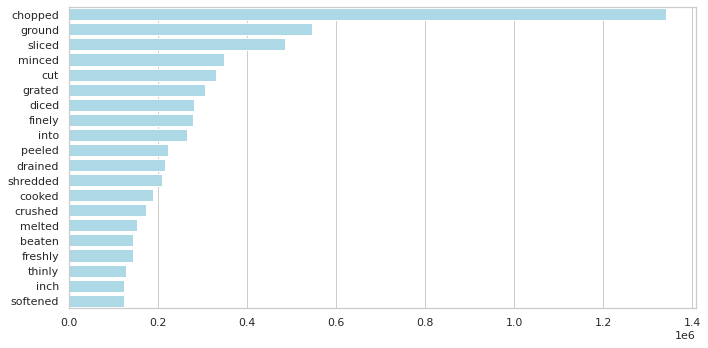

100%|██████████| 2231140/2231140 [01:05<00:00, 34141.37it/s]


PHYSICAL_QUALITY: unique_values = 46408, avg. entities: 1.2693368156505014, avg. token: 1.1024760208653919


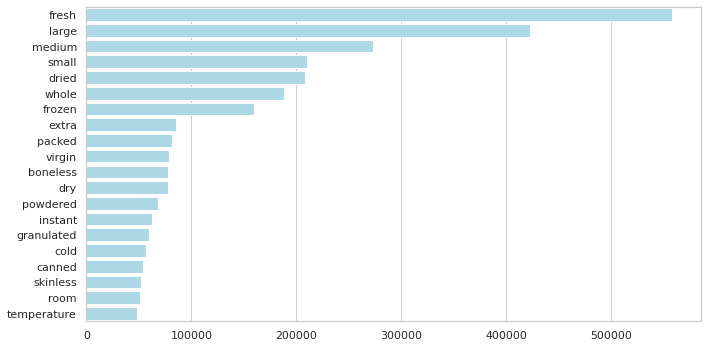

100%|██████████| 2231140/2231140 [01:03<00:00, 35218.22it/s]


COLOR: unique_values = 754, avg. entities: 0.45636994866526376, avg. token: 1.0131632249202618


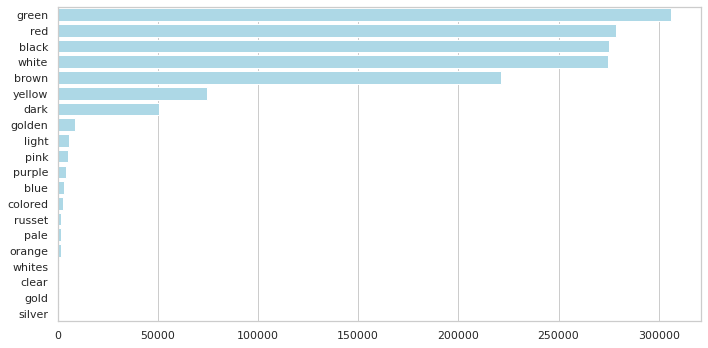

100%|██████████| 2231140/2231140 [01:01<00:00, 36483.61it/s]


TRADE_NAME: unique_values = 61358, avg. entities: 0.12522308842554503, avg. token: 1.6029199433925085


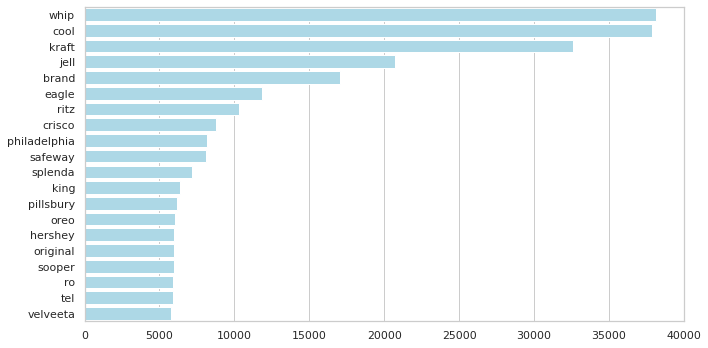

100%|██████████| 2231140/2231140 [01:02<00:00, 35869.81it/s]


TASTE: unique_values = 3357, avg. entities: 0.15698522270913384, avg. token: 1.0188300708970142


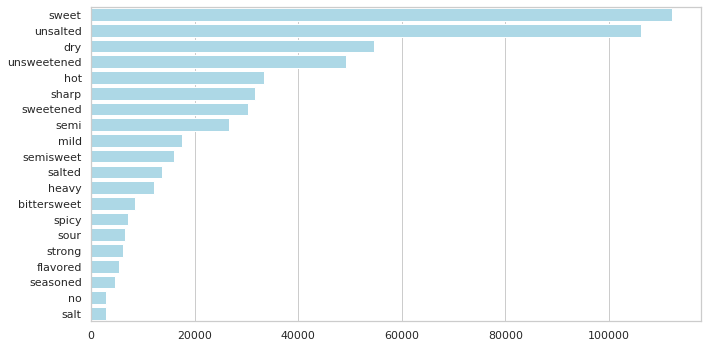

100%|██████████| 2231140/2231140 [01:02<00:00, 35775.89it/s]


PART: unique_values = 1516, avg. entities: 0.10359707484360485, avg. token: 1.067494916481427


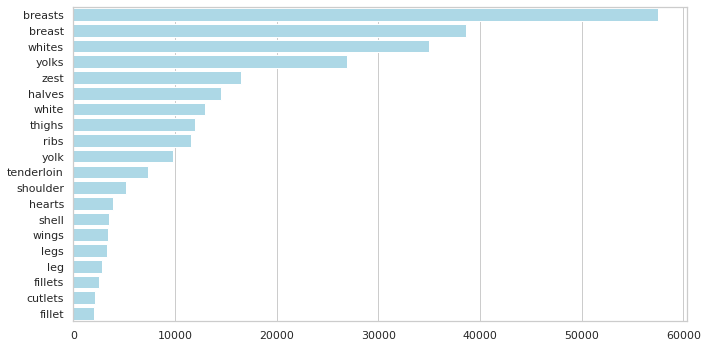

100%|██████████| 2231140/2231140 [01:03<00:00, 34980.43it/s]


PURPOSE: unique_values = 26352, avg. entities: 0.0586786161194294, avg. token: 2.2855007473841553


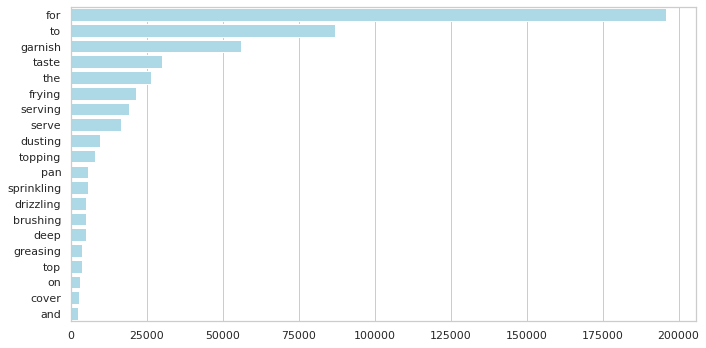

100%|██████████| 2231140/2231140 [01:03<00:00, 35197.30it/s]


DIET: unique_values = 3924, avg. entities: 0.0814033843099266, avg. token: 1.135475284197902


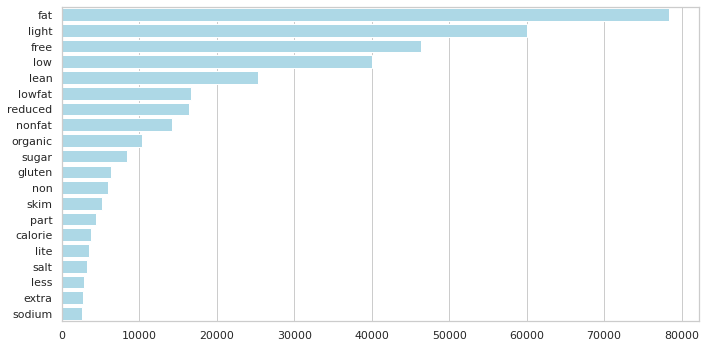

100%|██████████| 2231140/2231140 [01:00<00:00, 36603.35it/s]


EXAMPLE: unique_values = 34278, avg. entities: 0.05733715914638198, avg. token: 1.3301186561963603


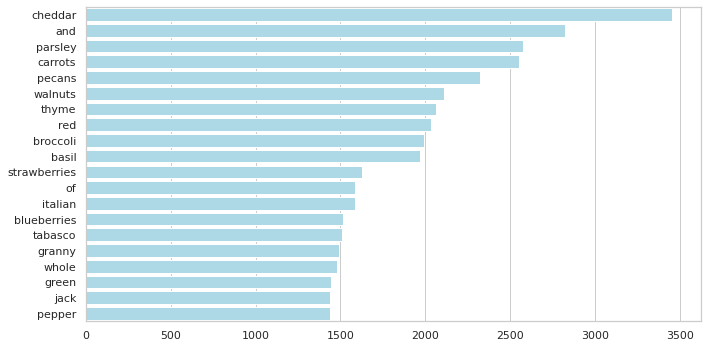

In [ ]:
import numpy as np
from tqdm import tqdm

for entity_name in ["FOOD", "QUANTITY", "UNIT", "PROCESS", "PHYSICAL_QUALITY", "COLOR", "TRADE_NAME", "TASTE", "PART", "PURPOSE", "DIET", "EXAMPLE"]:
    entities = []
    avg_entity_count = []
    entity_count = []
    for one_row in tqdm(df["ingredients_entities"]):
        counter = 0
        for row in json.loads(one_row):
            if row["type"] == entity_name:
                counter +=1
                entities.append(row["entity"])
                entity_count.append(len(row["entity"].split()))
            avg_entity_count.append(counter)
    print(f"{entity_name}: unique_values = {len(set(entities))}, avg. entities: {np.mean(avg_entity_count)}, avg. token: {np.mean(entity_count)}")
    sns.set(rc={'figure.figsize':(10,5)})
    sns.set_style("whitegrid")
    top_tri_grams=get_top_ngram(entities,n=1)
    x,y = map(list,zip(*top_tri_grams))
    sns.barplot(x=y,y=x,color="lightblue", saturation=1)
    plt.tight_layout()
    # plt.title("Most frequent trigrams from ingredients")
    plt.show()

In [ ]:
entities = []
avg_entity_count = []
entity_count = []
for one_row in tqdm(df["ingredients_entities"]):
    counter = 0
    one_row_json = json.loads(one_row)
    for row in one_row_json:
        if row["type"] in ["FOOD", "QUANTITY", "UNIT", "PROCESS", "PHYSICAL_QUALITY", "COLOR", "TRADE_NAME", "TASTE", "PART", "PURPOSE", "DIET", "EXAMPLE"]:
            counter +=1
            entities.append(row["entity"])
            entity_count.append(len(row["entity"].split()))
        avg_entity_count.append(counter)
print(f"All: unique_values = {len(set(entities))}, avg. entities: {np.mean(avg_entity_count)}, avg. token: {np.mean(entity_count)}")


100%|██████████| 2231140/2231140 [01:31<00:00, 24453.63it/s]


FOOD: unique_values = 607893, avg. entities: 20.662700565556076, avg. token: 1.2017209204575832


In [ ]:
np.mean(df["ingredients_len"])

8.727044470539724

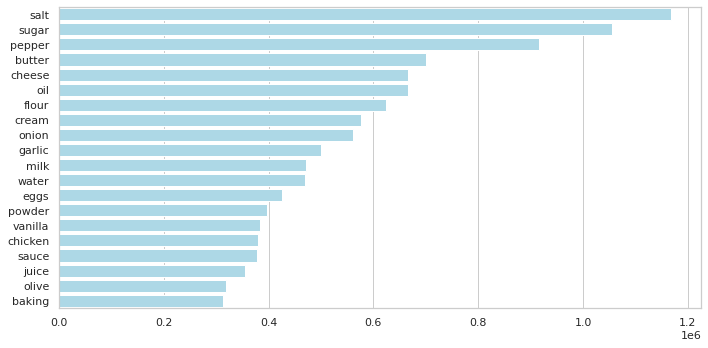

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")
top_tri_grams=get_top_ngram(entities,n=1)
x,y = map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x,color="lightblue", saturation=1)
plt.tight_layout()
# plt.title("Most frequent trigrams from ingredients")
plt.show()

In [ ]:
tru_entities = ['quantity', 'unit', 'process', 'physical_quality', 'color', 'taste', 'purpose', 'part']
all_entities_rev = []
for elem in all_entities:
  if "food" in elem.lower():
    all_entities_rev.append('FOOD')
  if elem.lower() in tru_entities:
    all_entities_rev.append(elem)

/home/witold/PycharmProjects/dml_analysis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


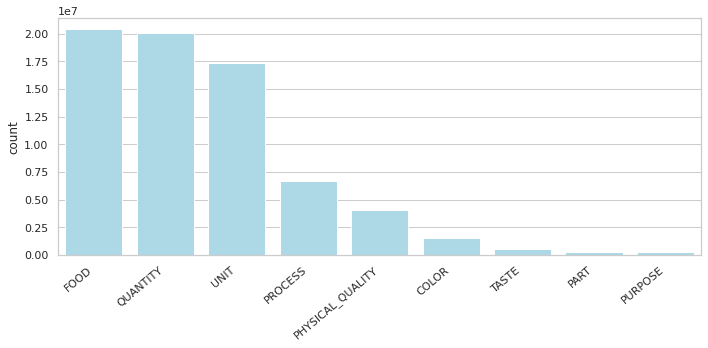

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")
entities_ordered_by_frequency = [el[0] for el in pd.DataFrame(all_entities_rev).value_counts().index]
ax = sns.countplot(all_entities_rev, order=entities_ordered_by_frequency,color="lightblue", saturation=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
# plt.title("Histogram of the entities")
plt.show()

TODO: coverage
Unikalne

**Summary**

The dataset contains 7 columns:

*   title
*   ingredients
*   directions
*   link
*   source
*   NER
*   total_time - from 'annotation' source ??
*   yields - from 'annotation' source ??
*   image - from 'annotation' source - image of the food
*   host - from 'annotation' source but has been populated over RecipeNLG
*   source - either RecipeNLG or new dataset 'annotation'

*Title* is a short string that is scraped from the recipe website. There are 1312871 unique titles out of 2231142, this is because different recipes sometimes have the same title, not that there are duplicates in the dataset.

*Ingredients* are in the form of json list that contains 8.7 elements on average. The shortest list contains 1 element and the longest 407! There several rows that contain the same list of elements but they belong to different recipes.

*Directions* are in the form of json list that contains 6.6 elements on average. The shortest list contains 1 element and the longest 164. There several rows that contain the same list of elements but they belong to different recipes.

There are multiple rows that have same *title* and ingredient or *title* and directions which indicate that there several recipes are simmilar.

*Link* column contains the webpage from which particular recipe was scraped.

*NER* column contains identified food entities belonging to the particular recipe based on the ingredients column


*Source* column indicates whether the recipe was gathered from the webpage or taken from the Recipes1M dataset. We can see that more than 1.6 recipes were gather from the web and about 600k were taken from the Recipes1M dataset